### Module 1: Introduction to Portfolio Analysis

In [3]:
import sys
print(f"Python environment: {sys.executable}")

Python environment: c:\Users\franc\anaconda3\envs\portfolio\python.exe


#### Lab1: Returns

How to compute the return from prices

In [4]:
prices_a = [8.7, 8.91, 8.71]

In [5]:
8.91/8.7 - 1

0.024137931034482918

In [6]:
prices_a[1:] #Everything except the first element with slicing. Index starts at 0

[8.91, 8.71]

In [7]:
prices_a[:-1] #Everything except the last element with slicing.

[8.7, 8.91]

In [8]:
#Lists in python are not vectors, like MATLAB or R. To do vectorized operations, we can use numpy arrays.
import numpy as np

In [9]:
prices_a = np.array([8.7, 8.91, 8.71])
prices_a 

array([8.7 , 8.91, 8.71])

In [10]:
prices_a[1:]/prices_a[:-1] - 1

array([ 0.02413793, -0.02244669])

In [11]:
import pandas as pd

In [12]:
prices = pd.DataFrame({"BLUE":[8.7, 8.91, 8.71, 8.43, 8.73],
                       "ORANGE":[10.66, 11.08, 10.71, 11.59, 12.11]
                       })

In [13]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [14]:
prices.iloc[1:] #iloc is index location

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [15]:
prices.iloc[1:].values/prices.iloc[:-1] - 1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [16]:
#Alternative way

prices/prices.shift(1) - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [17]:
#alternative way using pct_change method
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [18]:
prices = pd.read_csv("data/sample_prices.csv")
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [19]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


<Axes: >

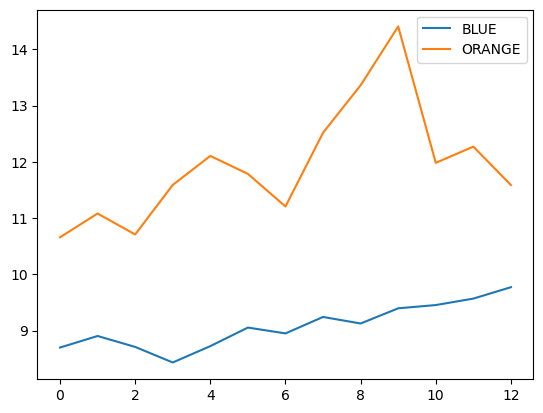

In [20]:
prices.plot()

<Axes: >

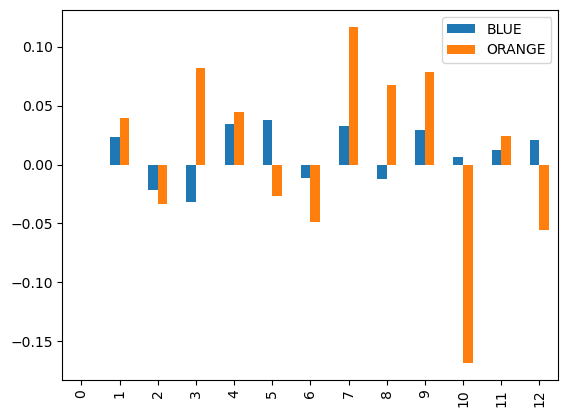

In [21]:
returns.plot.bar()

In [22]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [23]:
returns+1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [24]:
np.prod(returns+1)-1 #calculation of the compound return over the entire period. We multiply all the (1+return) and subtract 1 at the end.
#or
(returns+1).prod()-1

c:\Users\franc\anaconda3\envs\portfolio\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


BLUE      0.123310
ORANGE    0.087167
dtype: float64

#### Lab1: Annualization

In [25]:
rm = .01
print(f"Monthly to Annual: {(1+rm)**12 - 1:.2%}")
print(f"Quarterly to Annual: {(1+rm)**4 - 1:.2%}")


Monthly to Annual: 12.68%
Quarterly to Annual: 4.06%


#### Lab2: Volatility

In [26]:
returns = returns.dropna() #drop the NA values that appear in the first row


In [27]:
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [28]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [29]:
deviations = returns- returns.mean()
deviations

,BLUE,ORANGE
1,0.013621,0.029662
2,-0.031807,-0.043638
3,-0.041763,0.072232
4,0.024477,0.034544
5,0.027786,-0.036381
6,-0.021452,-0.059187
7,0.022677,0.107008
8,-0.022581,0.057353
9,0.019581,0.068250
10,-0.003849,-0.178261


In [30]:
squared_deviations = deviations**2
variance = squared_deviations.mean()



volatility = np.sqrt(variance)
volatility #Not same result as SD because in SD formula we divide by N+1 because it is a sample, not the entire population (using mean dividing by N)

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [31]:
returns.shape

(12, 2)

In [32]:
number_of_obs = returns.shape[0]

variance = (squared_deviations.sum())/(number_of_obs-1)
volatility = np.sqrt(variance)

print(volatility)
print(returns.std())

BLUE      0.023977
ORANGE    0.079601
dtype: float64
BLUE      0.023977
ORANGE    0.079601
dtype: float64


In [33]:
volatility*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [34]:
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                      header=0, index_col=0,parse_dates=True,na_values=-99.99)

C:\Users\franc\AppData\Local\Temp\ipykernel_32408\2300222599.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",


In [35]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [36]:
columns = ["Lo 10", "Hi 10"]
returns = returns[columns]
returns = round(returns/100,5)

In [37]:
returns.columns = ["Small Cap", "Large Cap"]
returns.head()

,Small Cap,Large Cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<Axes: >

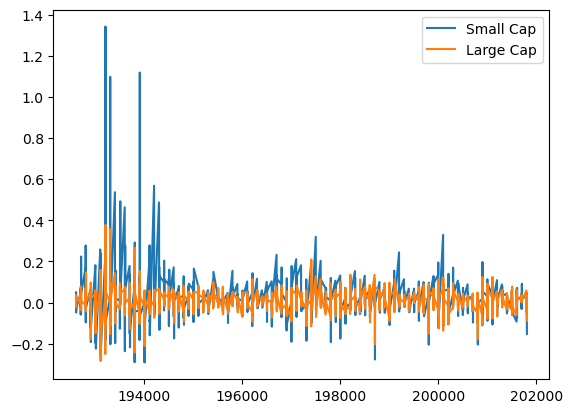

In [38]:
returns.plot()

In [39]:
returns.std()

Small Cap    0.106288
Large Cap    0.053900
dtype: float64

In [40]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

Small Cap    0.368193
Large Cap    0.186716
dtype: float64

  Calculate the monthly return

In [41]:
#How many months
n_months = returns.shape[0]

return_month = (1+returns).prod()**(1/n_months)-1
return_month

Small Cap    0.012986
Large Cap    0.007423
dtype: float64

In [42]:
annualized_return = (1+return_month)**12 -1
annualized_return

Small Cap    0.167463
Large Cap    0.092810
dtype: float64

Another way of doing annualized return

In [43]:
annualized_return = (1+returns).prod()**(12/n_months)-1
annualized_return

Small Cap    0.167463
Large Cap    0.092810
dtype: float64

Sharpe Risk ratio

In [44]:
riskfree_rate = 0.03 #in practice, we need the time series

In [45]:
(annualized_return - riskfree_rate)/annualized_vol

Small Cap    0.373346
Large Cap    0.336392
dtype: float64

#### Lab3: Drawdowns

##### Load and clean data

In [46]:
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   index_col=0,header=0,parse_dates=True,na_values=-99.99 )

rets = me_m[["Lo 10", "Hi 10"]]
rets.columns = ["Small Caps", "Large Caps"]
rets=round(rets/100,5)

rets.head()

C:\Users\franc\AppData\Local\Temp\ipykernel_32408\2858462060.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",


,Small Caps,Large Caps
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [47]:
rets.index #notice dtype is int64
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.head()

,Small Caps,Large Caps
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [48]:
#However, dates say the day too, not the full month. We need to convert.
rets.index =rets.index.to_period("M")
rets.head()



,Small Caps,Large Caps
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [49]:
rets['1975-01':'1975-12']
type(rets)
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Small Caps  1110 non-null   float64
 1   Large Caps  1110 non-null   float64
dtypes: float64(2)
memory usage: 58.3 KB


<Axes: >

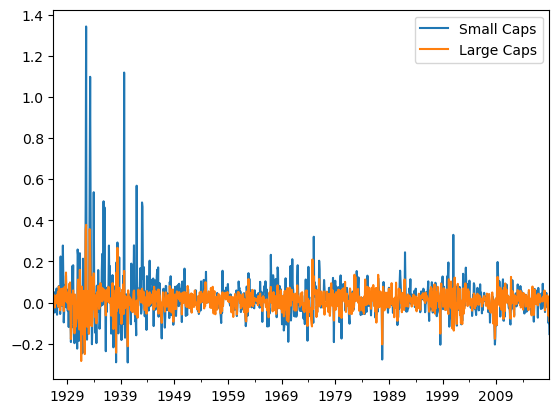

In [50]:
rets.plot()

##### Compute Wealth Index

In [51]:
#let's say initial investment is 1000 dollars. And see growth of 1 dollar over time
wealth_index = 1000*(1+rets["Large Caps"]).cumprod() #cumulative product
wealth_index

1926-07    1.032900e+03
1926-08    1.071117e+03
1926-09    1.078294e+03
1926-10    1.052091e+03
1926-11    1.080498e+03
               ...     
2018-08    4.175915e+06
2018-09    4.212246e+06
2018-10    3.935501e+06
2018-11    4.035069e+06
2018-12    3.675948e+06
Freq: M, Name: Large Caps, Length: 1110, dtype: float64

<Axes: >

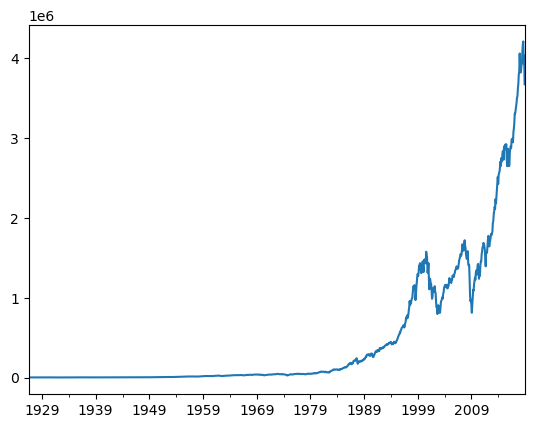

In [52]:
wealth_index.plot()

##### Compute Previous Peaks

<Axes: >

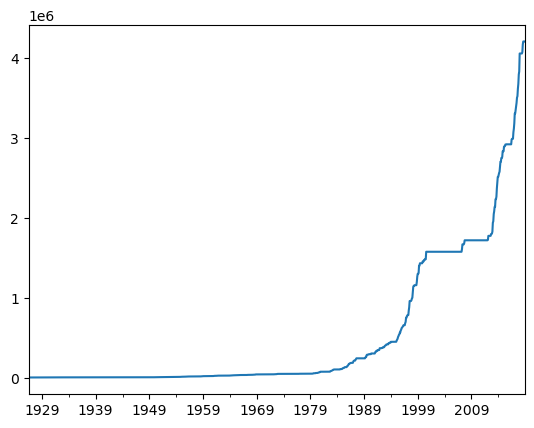

In [53]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

##### Compute Drawdown

<Axes: >

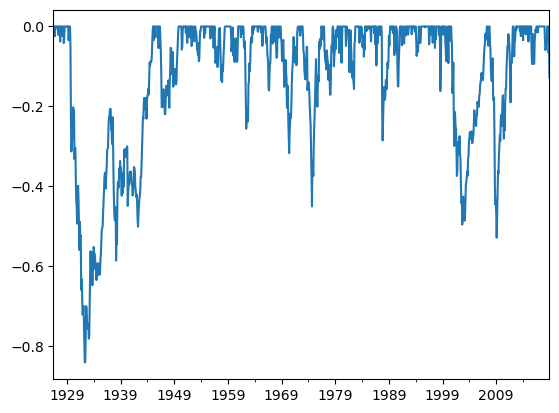

In [54]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In the previous plot we can see in 1929 people lost almost 80%.

In [55]:
drawdown.min()

-0.8400375277943124

In [56]:
drawdown["1975":].idxmin() #get the index of the minimum since 1975

Period('2009-02', 'M')

##### Custom function to calculate

In [57]:
def drawdown(return_series: pd.Series): #inputs. :pd.Series expresses the type
  """
  Takes a time series of returns
  Computes and returns a DataFrame that contains:
  wealth index
  previous peaks
  percent drawdowns
  """

  wealth_index = 1000*(1+return_series).cumprod()
  previous_peaks = wealth_index.cummax()
  drawdowns = (wealth_index-previous_peaks)/previous_peaks

  return pd.DataFrame({
    "Wealth": wealth_index,
    "previous_peaks": previous_peaks,
    "drawdowns": drawdowns
  })



In [58]:
drawdown(rets["Large Caps"]).head()

,Wealth,previous_peaks,drawdowns
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


<Axes: >

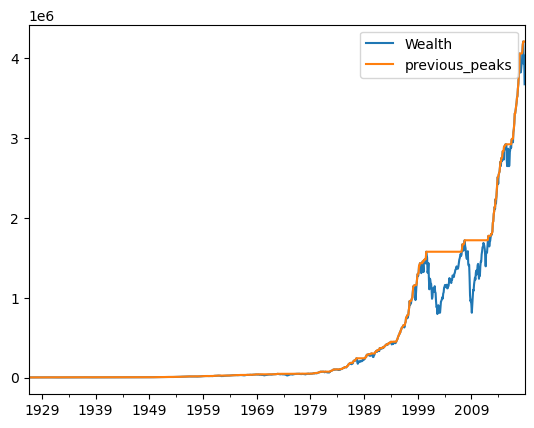

In [59]:
drawdown(rets["Large Caps"])[["Wealth","previous_peaks"]].plot()

<Axes: >

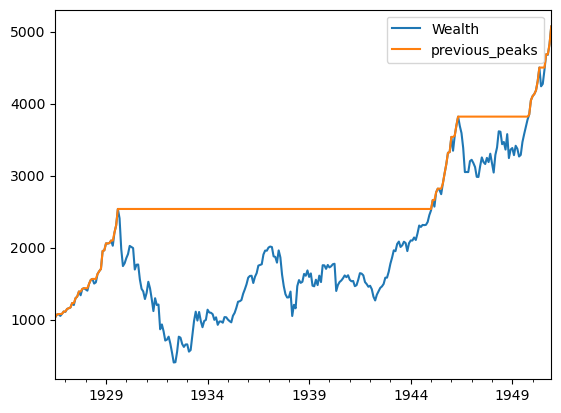

In [60]:
drawdown(rets[:"1950"]["Large Caps"])[["Wealth","previous_peaks"]].plot()

In [61]:
#just checking the drawdawns
print(drawdown(rets["Large Caps"])["drawdowns"].min())
print(drawdown(rets["Large Caps"])["drawdowns"].idxmin())
print(drawdown(rets["Small Caps"])["drawdowns"].min())
print(drawdown(rets["Small Caps"])["drawdowns"].idxmin())

-0.8400375277943124
1932-05
-0.8330007793945303
1932-05


In [62]:
print(drawdown(rets["1975":]["Large Caps"])["drawdowns"].min())
print(drawdown(rets["1975":]["Large Caps"])["drawdowns"].idxmin())
print(drawdown(rets["1975":]["Small Caps"])["drawdowns"].min())
print(drawdown(rets["1975":]["Small Caps"])["drawdowns"].idxmin())

-0.5280945042309303
2009-02
-0.6312068077252387
2009-02


#### Lab4:Building Modules

In [63]:
import hello as h
h.message #sample of how functions from libraries work. See hello.py

'Hello Vic'

libraries are not loaded everytime we use import. To do so, we need to use a magic command %

In [64]:
%load_ext autoreload

In [65]:
%autoreload 2

In [66]:
h.message

'Hello Vic'

In [67]:
import edhec_risk_kit as erk

In [68]:
drawdowns = erk.drawdown(rets["Large Caps"])
drawdowns["Wealth"].mean()

np.float64(473249.48843263707)

#### Lab5: Deviations from normality

Code to measure skewness and kurtosis of different indeces

In [69]:
hfi = erk.get_hfi_returns()

c:\Users\franc\OneDrive - Delft University of Technology\Documents\Python\portfolio_analyst\edhec_risk_kit.py:40: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv("data/edhec-hedgefundindices.csv",


In [70]:
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [71]:
pd.concat([hfi.mean(),hfi.median(),hfi.mean()>hfi.median()], axis = "columns")

,0,1,2
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


Skewness

In [72]:
erk.skewness(hfi).sort_values()
#if normal, skewness should be 0

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [73]:
#to compare, same calculation using skewness function from python

In [74]:
import scipy.stats

In [ ]:
scipy.stats.skew(hfi) #same checks

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

More tests of normality

In [77]:
normal_rets = np.random.normal(0,.15,size=(263,1))

In [78]:
erk.skewness(normal_rets)

np.float64(-0.05202794233426314)

Kurtosis

In [ ]:
erk.kurtosis(normal_rets) #close to 3 is normality

np.float64(2.885312605633332)

In [80]:
erk.kurtosis(hfi)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

In [ ]:
scipy.stats.kurtosis(normal_rets) #even though it says kurtosis, this is the excess kurtosis (substracting 3)

array([-0.11468739])

Test of statistical significance to determine normality

In [ ]:
scipy.stats.jarque_bera(normal_rets)
#the second one is the pvalue for the normal distribution. 

SignificanceResult(statistic=np.float64(0.2627898801033842), pvalue=np.float64(0.8768713943620559))

In [ ]:
scipy.stats.jarque_bera(hfi) #not working, because it takes all the samples as one unique sample.

SignificanceResult(statistic=np.float64(25656.585999171337), pvalue=np.float64(0.0))

In [86]:
erk.is_normal(normal_rets)
erk.is_normal(hfi)

np.False_

In [90]:
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [92]:
ffme = erk.get_ffme_returns()
erk.skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [93]:
erk.kurtosis(ffme)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [94]:
erk.is_normal(ffme)

np.False_

#### Lab6: Downside measures

##### Semi Deviation

In [ ]:
hfi.std(ddof=0) #full distro

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [101]:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [100]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

##### VaR and CVaR

- Historic VaR

In [103]:
np.percentile(hfi,5,axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [ ]:
def var_historic(r, level = 5):
  """
  VaR historic
  """

  if isinstance(r, pd.DataFrame):
    return r.aggregate(var_historic, level = level)
  elif isinstance(r, pd.Series):
    return -np.percentile(r,level) #it is semi deviation, so all are understood to be negative. We present them as positive
  else:
    raise TypeError("Expected r to be Series or DataFrame")

In [105]:
var_historic(hfi)

Convertible Arbitrage    -0.01576
CTA Global               -0.03169
Distressed Securities    -0.01966
Emerging Markets         -0.04247
Equity Market Neutral    -0.00814
Event Driven             -0.02535
Fixed Income Arbitrage   -0.00787
Global Macro             -0.01499
Long/Short Equity        -0.02598
Merger Arbitrage         -0.01047
Relative Value           -0.01174
Short Selling            -0.06783
Funds Of Funds           -0.02047
dtype: float64

In [110]:
erk.var_historic(hfi)

NameError: name 'var_historic' is not defined

- Parametric VaR - Gaussian

- Modifier VaR OR Cornish-Fisher VaR